In [10]:
### Gets skew and mid charts

###
###   To do: add DTE on legend, 
###          plot bid & ask together, 
###          automatically get symbols from top activity, 
###          put front expirations in front of back,
###          figure out how to dynamically fit plots.
###
###        - Change plot legend to human instead of linux time (+ DTE)
###

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import json
from pandas.io.json import json_normalize

In [11]:
# Replace this with scrapers for top IV, top vol, and earnings.

symbol_list = ['SPY', 'FB', 'AAPL', 'AMZN', 'NFLX', 'GOOG', 'IQ', 'TSLA', 'TLT', 'GLD', 'SLV']

url = 'https://query2.finance.yahoo.com/v7/finance/options/'

In [12]:
# Gets the third friday exp

def is_third_friday(s):
    d = datetime.datetime.strptime(s, '%Y-%m-%d')
    return d.weekday() == 3 and 15 <= d.day <= 21

In [13]:
# Gets expiration dates (in unix), converts to human time, gets the first weekly and two monthly dates, gets unix/human time for those.

def date_lister(symbol, exp):
    
    # Find better way to put unix and human dates together, reference the three dates you want.
    
    global dates_list
    
    # Make df for unix and human exp dates
    
    exp_df = pd.DataFrame()  
    exp_df['unix'] = exp[0].values
    
    # Get human values for exp_df
    
    ht_list = []
    
    for i in exp[0]:
        
        ht = datetime.datetime.fromtimestamp(int(i)).strftime('%Y-%m-%d')
        ht_list.append(ht)
        
    exp_df['human'] = ht_list
        
    # Get your nonweekly dates
    
    non_weeklies = []
    
    for date in ht_list:
        if is_third_friday(date) == True:
            non_weeklies.append(date)
            
        else:
            pass
        
    # Make list with first weekly and two nonweeklies, with unix and human time format
    
    dates_list = []
    
    dates_list.append(ht_list[0])
    
    for i in non_weeklies[:2]:
        dates_list.append(i)
    
    dates_list = pd.DataFrame(data = dates_list, columns = ['human'])
    
    dates_list['unix'] = [(exp_df.loc[exp_df['human'] == i, 'unix'].values[0]) for i in dates_list['human']]


In [14]:
def scraper(symbol):
    
    global oc_df
    
    optionschain = []
    
    for date in dates_list['unix']:
    
        newurl2 = newurl + '?date=' + str(date)

        # Temporary df's for our shit, written to different df later for output
        
        temp_df = pd.read_json(newurl2)

        chain = json_normalize(data=temp_df['optionChain']['result'], record_path='options')

        for j in chain.calls[0]:

            j.update({'type': 'call'})
            optionschain.append(j)

        for k in chain.puts[0]:

            k.update({'type': 'put'})
            optionschain.append(k)

        oc_df = pd.DataFrame(optionschain)
        
        #print(oc_df)
        
        ### Add mid, add DTE ###

In [19]:
def graph(symbol):
    
    # Figure out how to graph bid/ask together here
    
    for j in ['bid', 'impliedVolatility']:
        
        plt.figure(figsize = (10,5))
        
        colors = np.linspace(1, .25, len(dates_list))
        
        print(str(symbol) + ' ' + str(j))
        
        for i, k in zip(dates_list['unix'], colors):
            
            iv = oc_df[oc_df['expiration'] == i]
            
            iv_put = iv[iv['type'] == 'put']
            iv_call = iv[iv['type'] == 'call']

            otm_put = iv_put[iv_put['inTheMoney'] == False]
            otm_call = iv_call[iv_call['inTheMoney'] == False]

            plt.plot(otm_call[['strike', j]].set_index('strike'), label = str(i) + ' call', color=plt.cm.Oranges(k), lw=1)
            plt.plot(otm_put[['strike', j]].set_index('strike'), label = str(i) + ' put', color=plt.cm.Blues(k), lw=1)
            
        # Dynamically size plots here
            
        #plt.ylim(0, 1.75)
        #plt.xlim(200, 350)
        
        plt.legend()
        plt.show()
        plt.gcf().clear()

SPY bid


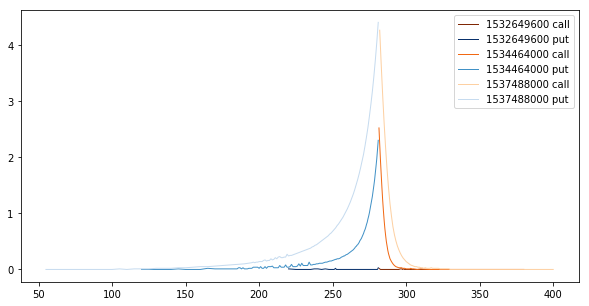

SPY impliedVolatility


<Figure size 432x288 with 0 Axes>

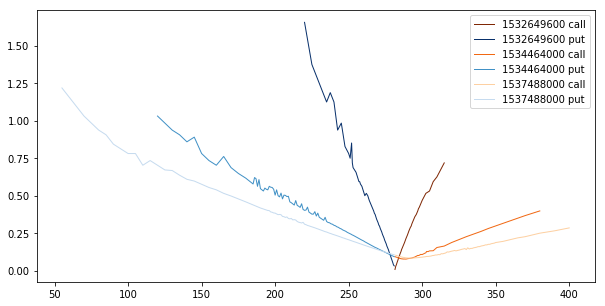

FB bid


<Figure size 432x288 with 0 Axes>

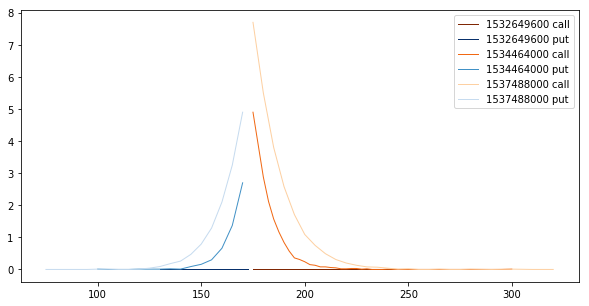

FB impliedVolatility


<Figure size 432x288 with 0 Axes>

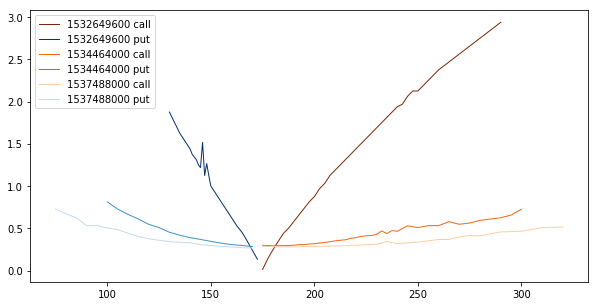

AAPL bid


<Figure size 432x288 with 0 Axes>

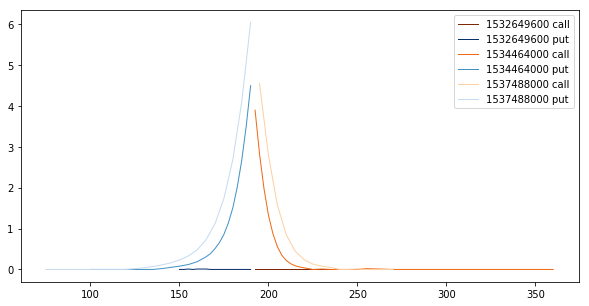

AAPL impliedVolatility


<Figure size 432x288 with 0 Axes>

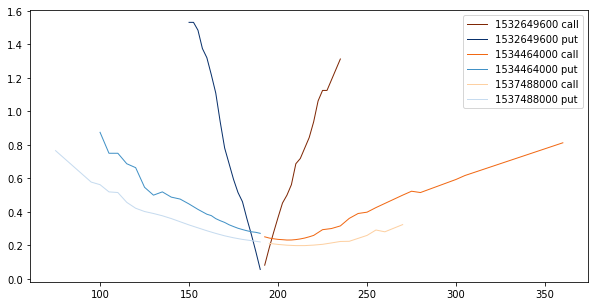

AMZN bid


<Figure size 432x288 with 0 Axes>

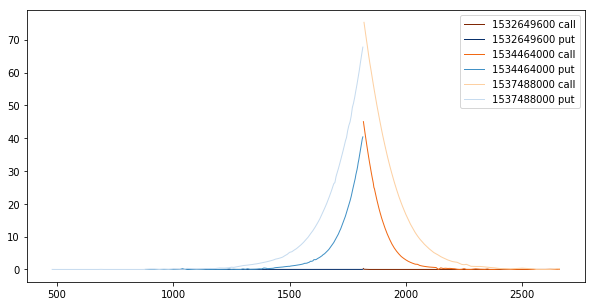

AMZN impliedVolatility


<Figure size 432x288 with 0 Axes>

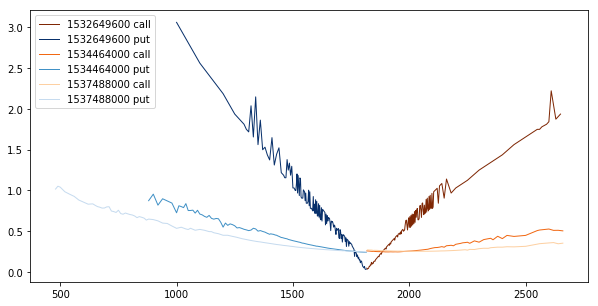

NFLX bid


<Figure size 432x288 with 0 Axes>

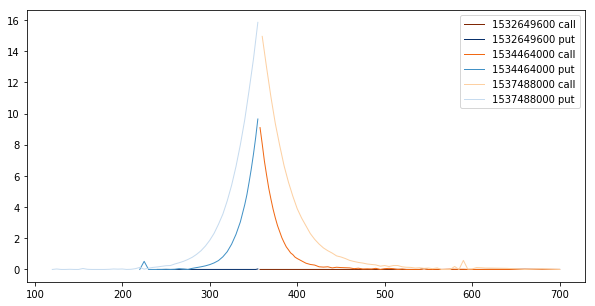

NFLX impliedVolatility


<Figure size 432x288 with 0 Axes>

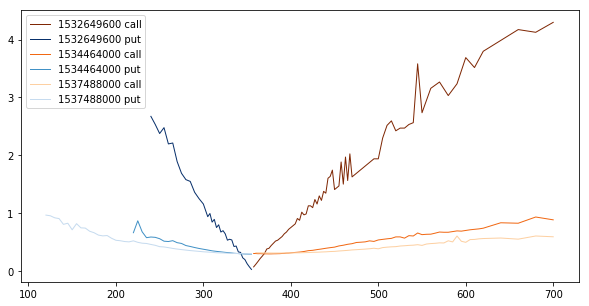

GOOG bid


<Figure size 432x288 with 0 Axes>

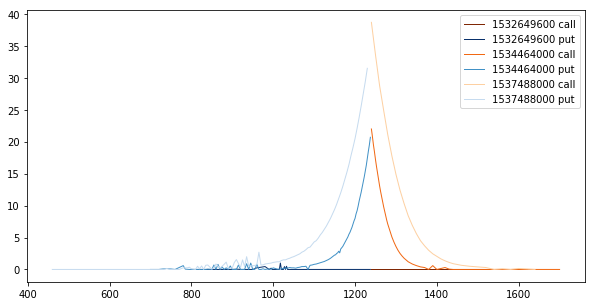

GOOG impliedVolatility


<Figure size 432x288 with 0 Axes>

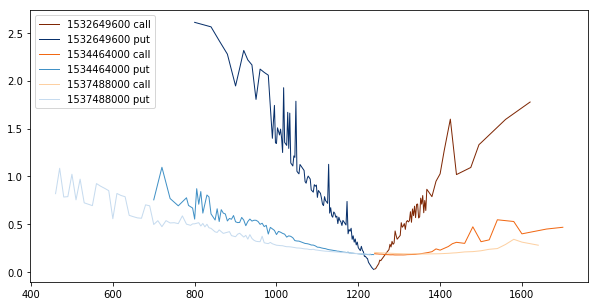

IQ bid


<Figure size 432x288 with 0 Axes>

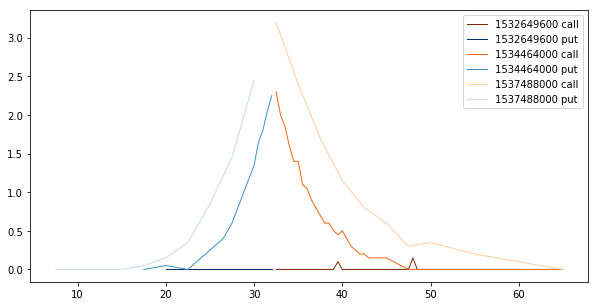

IQ impliedVolatility


<Figure size 432x288 with 0 Axes>

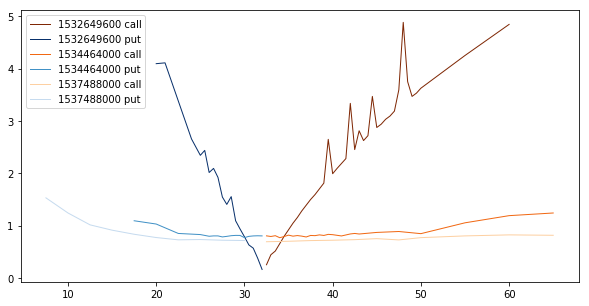

TSLA bid


<Figure size 432x288 with 0 Axes>

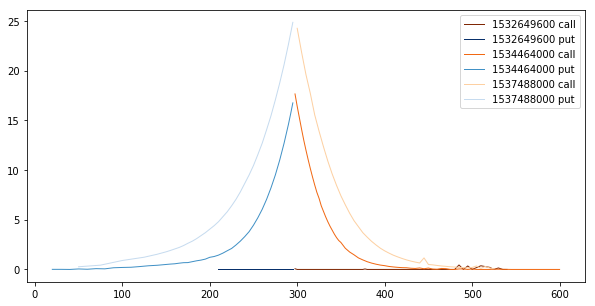

TSLA impliedVolatility


<Figure size 432x288 with 0 Axes>

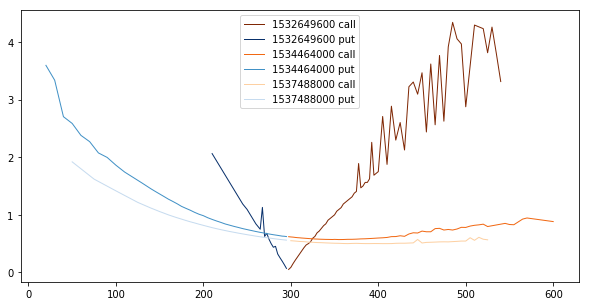

TLT bid


<Figure size 432x288 with 0 Axes>

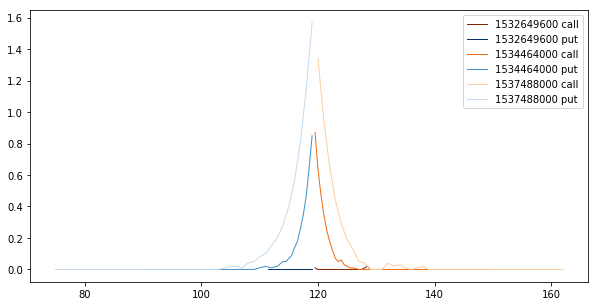

TLT impliedVolatility


<Figure size 432x288 with 0 Axes>

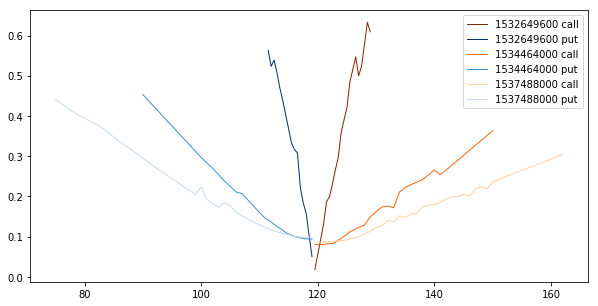

GLD bid


<Figure size 432x288 with 0 Axes>

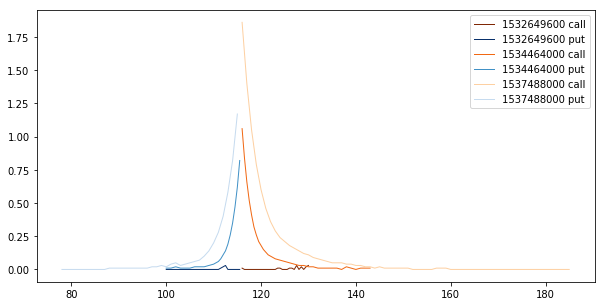

GLD impliedVolatility


<Figure size 432x288 with 0 Axes>

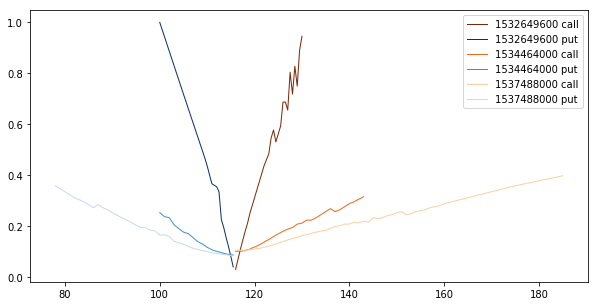

SLV bid


<Figure size 432x288 with 0 Axes>

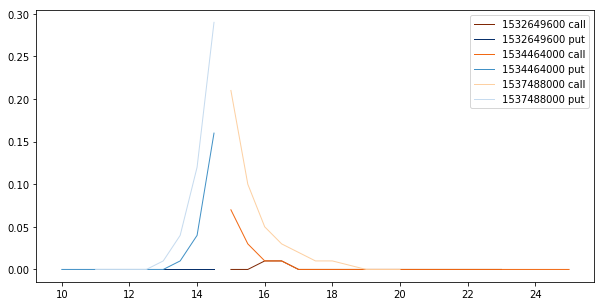

SLV impliedVolatility


<Figure size 432x288 with 0 Axes>

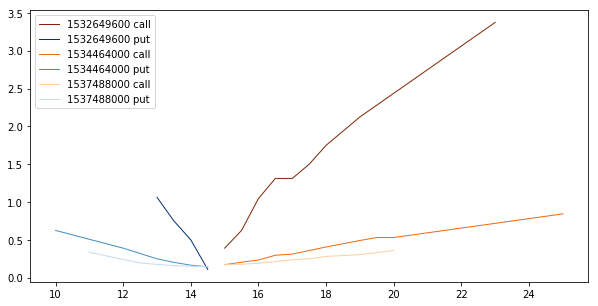

<Figure size 432x288 with 0 Axes>

In [20]:
# Symbol loop

for symbol in symbol_list:
    
    # Put this in date_lister()
    
    newurl = url + symbol
    
    df = pd.read_json(newurl)
    
    exp = json_normalize(data = df['optionChain']['result'], record_path = 'expirationDates')
    
    date_lister(symbol, exp)
    
    scraper(symbol)
    
    graph(symbol)
    